# Part 1: Load dataset

In [1]:
#Importing libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
## Importing the OS and JSON Modules
import os,json

In [2]:
# Load in superhero info 
info = pd.read_csv("Data/superhero_info - superhero_info.csv", low_memory = False)
info.head()

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}"
2,Abin Sur|DC Comics,Male,Ungaran,good,No Hair,blue,red,"{'Height': '185.0 cm', 'Weight': '90.0 kg'}"
3,Abomination|Marvel Comics,Male,Human / Radiation,bad,No Hair,green,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"
4,Absorbing Man|Marvel Comics,Male,Human,bad,No Hair,blue,Unknown,"{'Height': '193.0 cm', 'Weight': '122.0 kg'}"


In [3]:
# Load in superhero power
power = pd.read_csv("Data/superhero_powers - superhero_powers.csv", low_memory = False)
power.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


## Cleaning the info dataset

In [4]:
info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 463 entries, 0 to 462
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Hero|Publisher  463 non-null    object
 1   Gender          463 non-null    object
 2   Race            463 non-null    object
 3   Alignment       463 non-null    object
 4   Hair color      463 non-null    object
 5   Eye color       463 non-null    object
 6   Skin color      463 non-null    object
 7   Measurements    463 non-null    object
dtypes: object(8)
memory usage: 29.1+ KB


In [5]:
# Check duplicates
info.duplicated().sum()

0

In [6]:
# Exploring existing format with a few examples
info['Hero|Publisher'].head(2)

0            A-Bomb|Marvel Comics
1    Abe Sapien|Dark Horse Comics
Name: Hero|Publisher, dtype: object

Need to split the Hero and Publisher into two columns

In [7]:
## save the 2 new columns into the dataframe
info[['Hero','Publisher']] = info['Hero|Publisher'].str.split('|',expand=True)
info.head(2)

,Hero|Publisher,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,A-Bomb|Marvel Comics,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Abe Sapien|Dark Horse Comics,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [8]:
## drop the original column 
info = info.drop(columns=['Hero|Publisher'])
info.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics


In [9]:
## examining a single value from the Measurement col
measure = info.loc[0,"Measurements"]
print(type(measure))
measure

<class 'str'>


"{'Height': '203.0 cm', 'Weight': '441.0 kg'}"

In [10]:
## use .str.replace to replace all single quotes
info['Measurements'] = info['Measurements'].str.replace("'",'"')
## Apply the json.loads to the full column
info['Measurements'] = info['Measurements'].apply(json.loads)
info['Measurements'].head()

0    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
1     {'Height': '191.0 cm', 'Weight': '65.0 kg'}
2     {'Height': '185.0 cm', 'Weight': '90.0 kg'}
3    {'Height': '203.0 cm', 'Weight': '441.0 kg'}
4    {'Height': '193.0 cm', 'Weight': '122.0 kg'}
Name: Measurements, dtype: object

In [11]:
hei_wei = info['Measurements'].apply(pd.Series)
hei_wei

,Height,Weight
0,203.0 cm,441.0 kg
1,191.0 cm,65.0 kg
2,185.0 cm,90.0 kg
3,203.0 cm,441.0 kg
4,193.0 cm,122.0 kg
...,...,...
458,183.0 cm,83.0 kg
459,165.0 cm,52.0 kg
460,66.0 cm,17.0 kg
461,170.0 cm,57.0 kg


In [12]:
# concat hei_wei with original dataframe
info = pd.concat((info, hei_wei), axis = 1)
info.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Measurements,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,"{'Height': '203.0 cm', 'Weight': '441.0 kg'}",A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,"{'Height': '191.0 cm', 'Weight': '65.0 kg'}",Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg


In [13]:
## drop the original column 
info = info.drop(columns=['Measurements'])
info.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg


In [14]:
## Create new columns and add into the dataframe
info[['Height_in_cm','cm']] = info['Height'].str.split(' ',expand=True)
info.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,Height_in_cm,cm
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg,203.0,cm
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg,191.0,cm


In [15]:
## Create new columns and add into the dataframe
info[['Weight_in_kg','kg']] = info['Weight'].str.split(' ',expand=True)
info.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height,Weight,Height_in_cm,cm,Weight_in_kg,kg
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0 cm,441.0 kg,203.0,cm,441.0,kg
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0 cm,65.0 kg,191.0,cm,65.0,kg


In [16]:
## drop the original column 
info = info.drop(columns=['Height', 'Weight', 'kg', 'cm'])
info.head(2)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height_in_cm,Weight_in_kg
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0


In [17]:
# Now we can change the height and weight column to a float
info['Height_in_cm'] = info['Height_in_cm'].astype(float)
info['Weight_in_kg'] = info['Weight_in_kg'].astype(float)

In [18]:
# Lets look at our new datatypes
info.dtypes

Gender           object
Race             object
Alignment        object
Hair color       object
Eye color        object
Skin color       object
Hero             object
Publisher        object
Height_in_cm    float64
Weight_in_kg    float64
dtype: object

## Cleaning the Power dataset

In [19]:
power.head()

,hero_names,Powers
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du..."
3,Abin Sur,Lantern Power Ring
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt..."


In [20]:
power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 667 entries, 0 to 666
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   hero_names  667 non-null    object
 1   Powers      667 non-null    object
dtypes: object(2)
memory usage: 10.5+ KB


In [21]:
# Check duplicates
power.duplicated().sum()

0

In [22]:
power.loc[0,'Powers']

'Agility,Super Strength,Stamina,Super Speed'

Source: https://stackoverflow.com/questions/37646473/how-could-i-do-one-hot-encoding-with-multiple-values-in-one-cell

In [23]:
# Create a new column where the Powers column is split
power['power_split'] = power['Powers'].apply(lambda x: x.split(','))
power

,hero_names,Powers,power_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]"
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S..."
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance..."
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring]
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre..."
...,...,...,...
662,Yellowjacket II,"Flight,Energy Blasts,Size Changing","[Flight, Energy Blasts, Size Changing]"
663,Ymir,"Cold Resistance,Durability,Longevity,Super Str...","[Cold Resistance, Durability, Longevity, Super..."
664,Yoda,"Agility,Stealth,Danger Sense,Marksmanship,Weap...","[Agility, Stealth, Danger Sense, Marksmanship,..."
665,Zatanna,"Cryokinesis,Telepathy,Magic,Fire Control,Proba...","[Cryokinesis, Telepathy, Magic, Fire Control, ..."


In [24]:
## exploding the column of lists
exploded = power.explode('power_split')
exploded.head(10)

,hero_names,Powers,power_split
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Agility
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Strength
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Stamina
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed",Super Speed
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Accelerated Healing
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Durability
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Longevity
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Super Strength
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Stamina
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...",Camouflage


In [25]:
## saving the unique values from the exploded column
cols_to_make = exploded['power_split'].dropna().unique()
cols_to_make

array(['Agility', 'Super Strength', 'Stamina', 'Super Speed',
       'Accelerated Healing', 'Durability', 'Longevity', 'Camouflage',
       'Self-Sustenance', 'Cold Resistance', 'Underwater breathing',
       'Marksmanship', 'Weapons Master', 'Intelligence', 'Telepathy',
       'Immortality', 'Reflexes', 'Enhanced Sight', 'Sub-Mariner',
       'Lantern Power Ring', 'Invulnerability', 'Animation',
       'Super Breath', 'Dimensional Awareness', 'Flight', 'Size Changing',
       'Teleportation', 'Magic', 'Dimensional Travel',
       'Molecular Manipulation', 'Energy Manipulation', 'Power Cosmic',
       'Energy Absorption', 'Elemental Transmogrification',
       'Fire Resistance', 'Natural Armor', 'Heat Resistance',
       'Matter Absorption', 'Regeneration', 'Stealth', 'Power Suit',
       'Energy Blasts', 'Energy Beams', 'Heat Generation', 'Danger Sense',
       'Phasing', 'Force Fields', 'Hypnokinesis', 'Invisibility',
       'Enhanced Senses', 'Jump', 'Shapeshifting', 'Elasticity',
 

In [26]:
#create the new columns for each Power
for col in cols_to_make:
    power[col] = power['Powers'].str.contains(col)
power.head()

C:\Users\rdbha\AppData\Local\Temp\ipykernel_26696\3396987192.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  power[col] = power['Powers'].str.contains(col)
C:\Users\rdbha\AppData\Local\Temp\ipykernel_26696\3396987192.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  power[col] = power['Powers'].str.contains(col)
C:\Users\rdbha\AppData\Local\Temp\ipykernel_26696\3396987192.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

C:\Users\rdbha\AppData\Local\Temp\ipykernel_26696\3396987192.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  power[col] = power['Powers'].str.contains(col)
C:\Users\rdbha\AppData\Local\Temp\ipykernel_26696\3396987192.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  power[col] = power['Powers'].str.contains(col)
C:\Users\rdbha\AppData\Local\Temp\ipykernel_26696\3396987192.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

C:\Users\rdbha\AppData\Local\Temp\ipykernel_26696\3396987192.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  power[col] = power['Powers'].str.contains(col)
C:\Users\rdbha\AppData\Local\Temp\ipykernel_26696\3396987192.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  power[col] = power['Powers'].str.contains(col)
C:\Users\rdbha\AppData\Local\Temp\ipykernel_26696\3396987192.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  

,hero_names,Powers,power_split,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,"Agility,Super Strength,Stamina,Super Speed","[Agility, Super Strength, Stamina, Super Speed]",True,True,True,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,"Accelerated Healing,Durability,Longevity,Super...","[Accelerated Healing, Durability, Longevity, S...",False,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
2,Abe Sapien,"Agility,Accelerated Healing,Cold Resistance,Du...","[Agility, Accelerated Healing, Cold Resistance...",True,True,True,False,True,True,True,...,False,False,False,False,False,False,False,False,False,False
3,Abin Sur,Lantern Power Ring,[Lantern Power Ring],False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Abomination,"Accelerated Healing,Intelligence,Super Strengt...","[Accelerated Healing, Intelligence, Super Stre...",False,True,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [27]:
## drop the original column 
power = power.drop(columns=['Powers', 'power_split'])
power.head(2)

,hero_names,Agility,Super Strength,Stamina,Super Speed,Accelerated Healing,Durability,Longevity,Camouflage,Self-Sustenance,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,3-D Man,True,True,True,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,A-Bomb,False,True,True,False,True,True,True,True,True,...,False,False,False,False,False,False,False,False,False,False


## Merge the two dataframes

In [28]:
## merge with our info dataframe
merged = pd.merge(info, power, left_on='Hero', right_on='hero_names', how='left')
merged.head(3)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height_in_cm,Weight_in_kg,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False


In [29]:
# Lets look at the info
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 463 entries, 0 to 462
Columns: 178 entries, Gender to Changing Armor
dtypes: bool(167), float64(2), object(9)
memory usage: 118.9+ KB


In [30]:
## drop the duplicate column 
merged = merged.drop(columns=['hero_names'])
merged.head(5)

,Gender,Race,Alignment,Hair color,Eye color,Skin color,Hero,Publisher,Height_in_cm,Weight_in_kg,...,Weather Control,Omnipresent,Omniscient,Hair Manipulation,Nova Force,Odin Force,Phoenix Force,Intuitive aptitude,Melting,Changing Armor
0,Male,Human,good,No Hair,yellow,Unknown,A-Bomb,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
1,Male,Icthyo Sapien,good,No Hair,blue,blue,Abe Sapien,Dark Horse Comics,191.0,65.0,...,False,False,False,False,False,False,False,False,False,False
2,Male,Ungaran,good,No Hair,blue,red,Abin Sur,DC Comics,185.0,90.0,...,False,False,False,False,False,False,False,False,False,False
3,Male,Human / Radiation,bad,No Hair,green,Unknown,Abomination,Marvel Comics,203.0,441.0,...,False,False,False,False,False,False,False,False,False,False
4,Male,Human,bad,No Hair,blue,Unknown,Absorbing Man,Marvel Comics,193.0,122.0,...,False,False,False,False,False,False,False,False,False,False


# Part 2: Use your combined DataFrame to answer the following questions.

1.Compare the average weight of super powers who have Super Speed to those who do not.

In [31]:
# Lets see average weight of super powers who have Super Speed 
weightby_superpower = merged.groupby(['Super Speed'])['Weight_in_kg'].mean()
weightby_superpower

Super Speed
False    101.773585
True     129.404040
Name: Weight_in_kg, dtype: float64

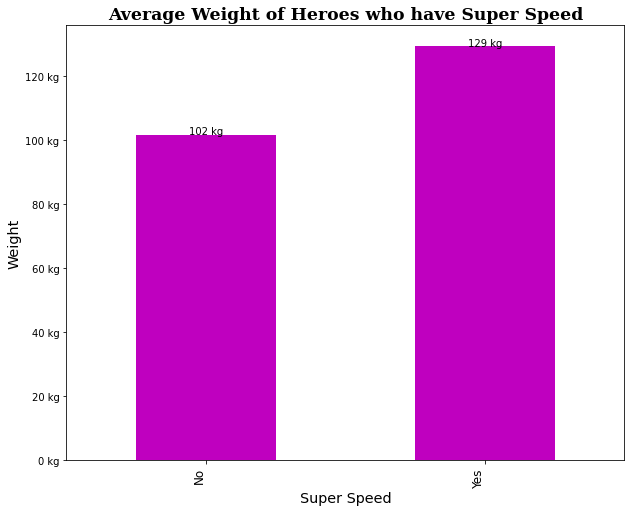

In [32]:
#Lets plot the above result
fig, ax = plt.subplots(figsize=(10,8))
graph = weightby_superpower.plot(kind="bar", color = 'm');
ax.set_title('Average Weight of Heroes who have Super Speed', 
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold');

## Make height_fmt using the StrMethodFormatter and the appropriate format code
weight_fmt = mpl.ticker.StrMethodFormatter('{x:,.0f} kg')

## Adding Count labels 
for p in graph.patches:
    height = round(p.get_height(),2)
    graph.annotate(weight_fmt(height,0),(p.get_x()+p.get_width()/2, height + .1),ha="center")
    

## Increasing Axis Label Font Sizes
ax.set_xlabel('Super Speed',
            fontsize='x-large')
ax.set_ylabel("Weight",
              fontsize='x-large');
           

## Now, use the ax.yaxis.set_major_formatter method 
ax.yaxis.set_major_formatter(weight_fmt);

## Setting labels
label = ['No', 'Yes']
ax.set_xticklabels(label,
                   fontsize='large',  
         horizontalalignment='right');

From the above graph we can see that:
* Hero's who have "Super Speed" power have an average weight of 129 kg. 

* Hero's who do not have "Super Speed" power have an average weight of 102 kg. 



2.What is the average height of heroes for each publisher?

In [33]:
# Lets see average height of heroes for each publisher
heightby_publisher = merged.groupby(['Publisher'])['Height_in_cm'].mean()
heightby_publisher

Publisher
DC Comics            181.923913
Dark Horse Comics    176.909091
George Lucas         159.600000
Image Comics         211.000000
Marvel Comics        191.546128
Shueisha             171.500000
Star Trek            181.500000
Team Epic TV         180.750000
Unknown              178.000000
Name: Height_in_cm, dtype: float64

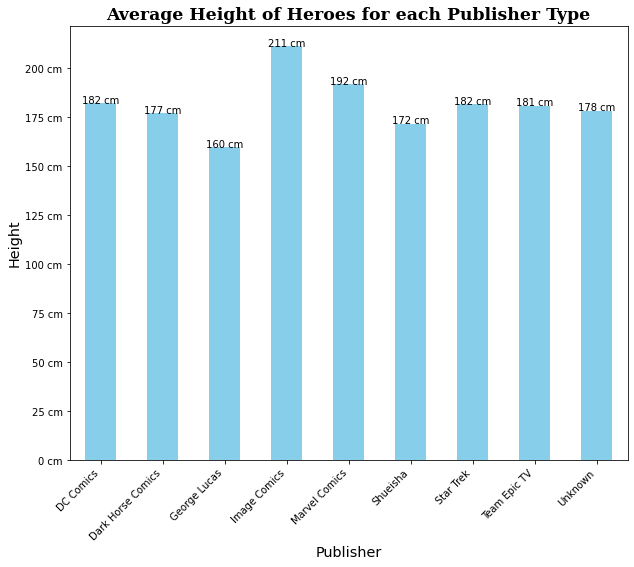

In [34]:
#Lets plot the above result
fig, ax = plt.subplots(figsize=(10,8))
graph = heightby_publisher.plot(kind="bar", color = 'skyblue');
ax.set_title('Average Height of Heroes for each Publisher Type', 
             fontfamily='serif',
             fontsize='xx-large',
             fontweight='semibold');

## Make height_fmt using the StrMethodFormatter and the appropriate format code
height_fmt = mpl.ticker.StrMethodFormatter('{x:,.0f} cm')

## Adding Count labels 
for p in graph.patches:
    height = round(p.get_height(),2)
    graph.annotate(height_fmt(height,0),(p.get_x()+p.get_width()/2, height + .1),ha="center")
    

## Increasing Axis Label Font Sizes
ax.set_xlabel('Publisher',
              fontsize='x-large')
ax.set_ylabel("Height",
              fontsize='x-large')

## Make height_fmt using the StrMethodFormatter and the appropriate format code
height_fmt = mpl.ticker.StrMethodFormatter('{x:,.0f} cm')

## rotating labels
labels = ax.get_xticklabels()
plt.setp(labels, 
         rotation=45, 
         horizontalalignment='right')

## Now, use the ax.yaxis.set_major_formatter method 
ax.yaxis.set_major_formatter(height_fmt)


From the above graph we can see that:

* Hero's who belong to "DC Comics" publisher have an average height of 182 cm.


* Hero's who belong to "Dark Horse Comics" publisher have an average height of 177 cm.


* Hero's who belong to "George Lucas" publisher have an average height of 160 cm.


* Hero's who belong to "Image Comics" publisher have an average height of 211 cm.


* Hero's who belong to "Marvel Comics" publisher have an average height of 192 cm.


* Hero's who belong to "Shueisha" publisher have an average height of 172 cm.


* Hero's who belong to "Star Trek" publisher have an average height of 182 cm.


* Hero's who belong to "Team Epic TV" publisher have an average height of 181 cm.


* Hero's who belong to "Unknown" publisher have an average height of 178 cm.